<a href="https://colab.research.google.com/github/LucasChomyszak/Computer_Vision/blob/main/Segment_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Function That will take any image, covert to gray, check the dtype - ensure it is Uint8, Group using the chosen method.


In [ ]:
#takes the path of where the image is stored
import skimage as sk
import sklearn as skl
from sklearn.metrics import adjusted_rand_score
from skimage.color import rgb2gray
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from matplotlib import gridspec
from skimage.filters import threshold_otsu


def Segment(ImPath,Method,n_clusters):
  Im_Og=io.imread(ImPath) #Loads Image from wherever it is stored
  Im_gray = rgb2gray(Im_Og)#converts to gray


  if Im_gray.dtype != 'uint8': # checks that it is Unit8, if it is not, it will convert
    if Im_gray.dtype=='float64':
      Im_gray=Im_gray/Im_gray.max()
      Im_gray=Im_gray*255
      Im_gray=Im_gray.astype(np.uint8)

  #Kmeans
  if Method == 'Kmeans':

    Im_gray_flat=Im_gray.reshape(Im_gray.shape[0]*Im_gray.shape[1],1)

    Cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(Im_gray_flat)

    Im_Kmeans = Cluster.predict(Im_gray_flat)
    #Im_Kmeans= np.logical_not(Im_Kmeans)

    ImPrime=np.array(Im_Kmeans).reshape(Im_gray.shape[0],Im_gray.shape[1]).astype(np.uint8)

    fig = plt.figure(figsize=(15, 15))
    gs = gridspec.GridSpec(1, 2)

    ax1 = fig.add_subplot(gs[0,0])
    ax1.imshow(Im_gray, cmap=plt.cm.gray)
    ax1.set_title('Original Image')
    ax1.set_axis_off()

    ax2 = fig.add_subplot(gs[0,1])
    ax2.imshow(ImPrime, cmap=plt.cm.gray)
    ax2.set_title('KMeans with n_clusters {}'.format(n_clusters))
    ax2.set_axis_off()

    plt.show()
  else:
    #Otsu
    if Method=='Otsu':
      Otsu=threshold_otsu(Im_gray)

      Im_otsu= Im_gray>=Otsu

      fig = plt.figure(figsize=(15, 15))
      gs = gridspec.GridSpec(1, 2)

      ax1 = fig.add_subplot(gs[0,0])
      ax1.imshow(Im_gray, cmap=plt.cm.gray)
      ax1.set_title('Original Image')
      ax1.set_axis_off()

      ax2 = fig.add_subplot(gs[0,1])
      ax2.imshow(Im_otsu, cmap=plt.cm.gray)
      ax2.set_title('Image segmentation with Otsu Threshold T = {}'.format(Otsu))
      ax2.set_axis_off()
    else:
      if Method=='Both':
        Im_gray_flat=Im_gray.reshape(Im_gray.shape[0]*Im_gray.shape[1],1)

        Cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(Im_gray_flat)

        Im_Kmeans = Cluster.predict(Im_gray_flat)
        #Im_Kmeans= np.logical_not(Im_Kmeans)

        ImPrime=np.array(Im_Kmeans).reshape(Im_gray.shape[0],Im_gray.shape[1]).astype(np.uint8)

        Otsu=threshold_otsu(Im_gray)

        Im_otsu= Im_gray>=Otsu

        fig = plt.figure(figsize=(15, 15))
        gs = gridspec.GridSpec(1, 3)

        ax1 = fig.add_subplot(gs[0,0])
        ax1.imshow(Im_gray, cmap=plt.cm.gray)
        ax1.set_title('Original Image')
        ax1.set_axis_off()

        ax2 = fig.add_subplot(gs[0,1])
        ax2.imshow(ImPrime, cmap=plt.cm.gray)
        ax2.set_title('KMeans with n_clusters= {}'.format(n_clusters))
        ax2.set_axis_off()

        ax3 = fig.add_subplot(gs[0,2])
        ax3.imshow(Im_otsu, cmap=plt.cm.gray)
        ax3.set_title('Image segmentation with Otsu Threshold T = {}'.format(Otsu))
        ax3.set_axis_off()

        Im_otsu_flat = Im_otsu.flatten()
        Im_Kmeans_flat = ImPrime.flatten()

        ARS = adjusted_rand_score(Im_otsu_flat,Im_Kmeans_flat)
        print('The Adjusted Rand Score Between Kmeans and Otsu is {}'.format(ARS))

      else:
        print('The Method Input Did not match the format of the options. Please input either "Kmeans", "Otsu", or "Both".')






/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The Adjusted Rand Score Between Kmeans and Otsu is 0.9873868328128499


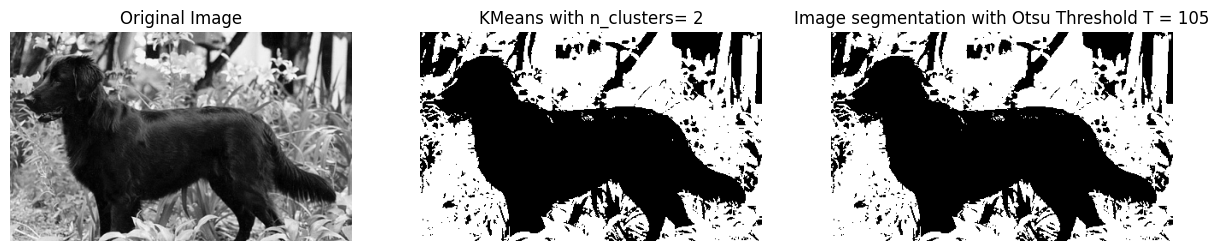

In [ ]:
Segment('2008_004653.jpg','Both',2)

In [29]:
import skimage as sk
import sklearn as skl
from sklearn.metrics import adjusted_rand_score
from skimage.color import rgb2gray
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from matplotlib import gridspec
from skimage.filters import threshold_otsu

def TrainTestSeg(TrainIm,TestIm,Method,n_clusters):
  ImTrain_Og=io.imread(TestIm) #Loads Image from wherever it is stored
  ImTest_Og=io.imread(TrainIm)

  ImTrain_gray = rgb2gray(ImTrain_Og)#converts to gray
  ImTest_gray = rgb2gray(ImTest_Og)

  if ImTrain_gray.dtype != 'uint8': # checks that it is Unit8, if it is not, it will convert
    if ImTrain_gray.dtype=='float64':
      ImTrain_gray=ImTrain_gray/ImTrain_gray.max()
      ImTrain_gray=ImTrain_gray*255
      ImTrain_gray=ImTrain_gray.astype(np.uint8)

  if ImTest_gray.dtype != 'uint8': # checks that it is Unit8, if it is not, it will convert
    if ImTest_gray.dtype=='float64':
      ImTest_gray=ImTest_gray/ImTest_gray.max()
      ImTest_gray=ImTest_gray*255
      ImTest_gray=ImTest_gray.astype(np.uint8)


  if Method=='Kmeans':
    ImTrain_gray_flat=ImTrain_gray.reshape(ImTrain_gray.shape[0]*ImTrain_gray.shape[1],1)
    ImTest_gray_flat=ImTest_gray.reshape(ImTest_gray.shape[0]*ImTest_gray.shape[1],1)


    Cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(ImTrain_gray_flat)

    ImTrain_Kmeans = Cluster.predict(ImTrain_gray_flat)
    ImTest_Kmeans = Cluster.predict(ImTest_gray_flat)


    ImTrainPrime=np.array(ImTrain_Kmeans).reshape(ImTrain_gray.shape[0],ImTrain_gray.shape[1])
    ImTestPrime=np.array(ImTest_Kmeans).reshape(ImTest_gray.shape[0],ImTest_gray.shape[1])

    fig=plt.figure(figsize=(8,8))
    gs=gridspec.GridSpec(2,2)


    ax1=fig.add_subplot(gs[0,0])
    ax1.imshow(ImTrain_gray,cmap=plt.cm.gray)
    ax1.set_title('Original Training Image')
    ax1.set_axis_off()

    ax2=fig.add_subplot(gs[0,1])
    ax2.imshow(ImTrainPrime,cmap=plt.cm.gray)
    ax2.set_title('Training Image - Kmeans')
    ax2.set_axis_off()

    ax3=fig.add_subplot(gs[1,0])
    ax3.imshow(ImTest_gray,cmap=plt.cm.gray)
    ax3.set_title('Original Test Image')
    ax3.set_axis_off()

    ax4=fig.add_subplot(gs[1,1])
    ax4.imshow(ImTestPrime,cmap=plt.cm.gray)
    ax4.set_title('Test Image - Kmeans')
    ax4.set_axis_off()

  else:
    if Method == 'Otsu':
      Otsu=threshold_otsu(ImTrain_gray)

      ImTrain_otsu= ImTrain_gray>=Otsu
      ImTest_otsu=ImTest_gray>=Otsu

      fig=plt.figure(figsize=(8,8))
      gs=gridspec.GridSpec(2,2)

      ax1=fig.add_subplot(gs[0,0])
      ax1.imshow(ImTrain_gray,cmap=plt.cm.gray)
      ax1.set_title('Original Training Image')
      ax1.set_axis_off()

      ax2=fig.add_subplot(gs[0,1])
      ax2.imshow(ImTrain_otsu,cmap=plt.cm.gray)
      ax2.set_title('Training Image - Otsu')
      ax2.set_axis_off()

      ax3=fig.add_subplot(gs[1,0])
      ax3.imshow(ImTest_gray,cmap=plt.cm.gray)
      ax3.set_title('Original Test Image')
      ax3.set_axis_off()

      ax4=fig.add_subplot(gs[1,1])
      ax4.imshow(ImTrain_otsu,cmap=plt.cm.gray)
      ax4.set_title('Test Image - Otsu Threshold {}'.format(Otsu))
      ax4.set_axis_off()
    else:
      print('User did not Input a Valid Method, the options are "Kmeans and "Otsu", and are case sensitive')



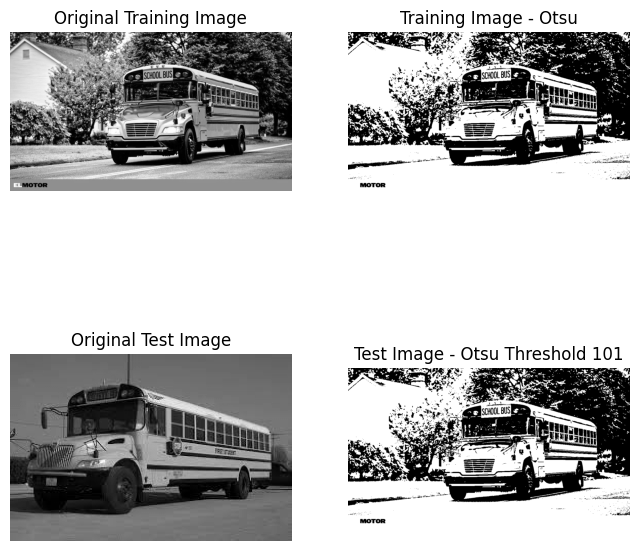

In [31]:
TrainTestSeg('Bus_train.jpg','Bus_Test.jpg','Otsu',0)